In [255]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Watershed

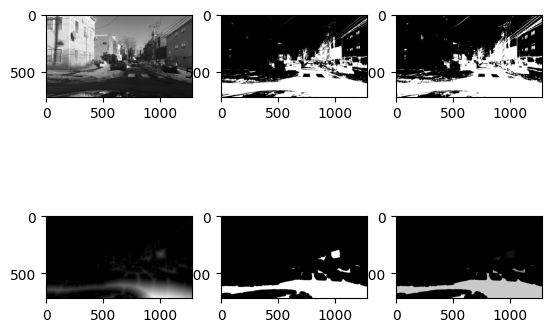

In [256]:
path = r'D:\College\pccoe\5th sem\CV\Practicals\Final_practicals\something-main\something-main\edge_images\7d06fefd-f7be05a6.jpg'
img = cv2.imread(path)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(231)
plt.imshow(img, cmap='gray')


plt.subplot(232)
_, imgThresh = cv2.threshold(img, 50, 255 , cv2.THRESH_BINARY_INV)
plt.imshow(imgThresh, cmap='gray')

plt.subplot(233)
kernel = np.ones((3 , 3), np.uint8)
dialated = cv2.morphologyEx(imgThresh, cv2.MORPH_DILATE, kernel, iterations=1)
plt.imshow(dialated, cmap='gray')

plt.subplot(234)
distTrans = cv2.distanceTransform(dialated, cv2.DIST_L2, 5)
plt.imshow(distTrans, cmap='gray')

plt.subplot(235)
_, distThresh = cv2.threshold(distTrans, 20, 255, cv2.THRESH_BINARY)
plt.imshow(distThresh, cmap='gray') 

plt.subplot(236)
distThresh = np.uint8(distThresh)
_, labels = cv2.connectedComponents(distThresh)
plt.imshow(labels, cmap='gray')


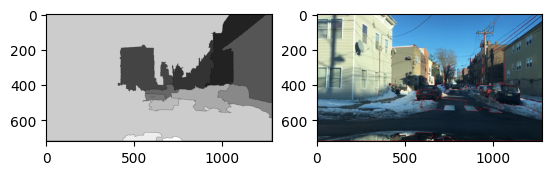

In [257]:
plt.figure()
plt.subplot(121)
labels = np.int32(labels)
labels = cv2.watershed(imgRGB, labels)

plt.imshow(labels)

plt.subplot(122)
imgRGB[labels == -1] = [255 , 0 ,0]
plt.imshow(imgRGB)

##### Thresholding

In [258]:
img = cv2.imread(r'D:\College\pccoe\5th sem\CV\Practicals\Final_practicals\something-main\something-main\dog\Dog Segmentation\Images\dog.8791.jpg', cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(img , 100, 255, cv2.THRESH_BINARY)

##### Global

In [259]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i , j] > 100:
            img[i , j] = 1
        else:
            img[i , j] = 0


(array([[274.,   0.,   0., ...,   0.,   0.,  11.],
        [278.,   0.,   0., ...,   0.,   0.,   7.],
        [278.,   0.,   0., ...,   0.,   0.,   7.],
        ...,
        [269.,   0.,   0., ...,   0.,   0.,  16.],
        [272.,   0.,   0., ...,   0.,   0.,  13.],
        [276.,   0.,   0., ...,   0.,   0.,   9.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 379 BarContainer objects>)

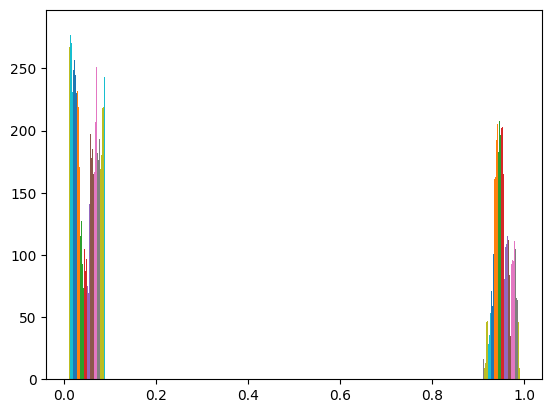

In [260]:
plt.hist(img)

(array([[274.,   0.,   0., ...,   0.,   0.,  11.],
        [278.,   0.,   0., ...,   0.,   0.,   7.],
        [278.,   0.,   0., ...,   0.,   0.,   7.],
        ...,
        [269.,   0.,   0., ...,   0.,   0.,  16.],
        [272.,   0.,   0., ...,   0.,   0.,  13.],
        [276.,   0.,   0., ...,   0.,   0.,   9.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 379 BarContainer objects>)

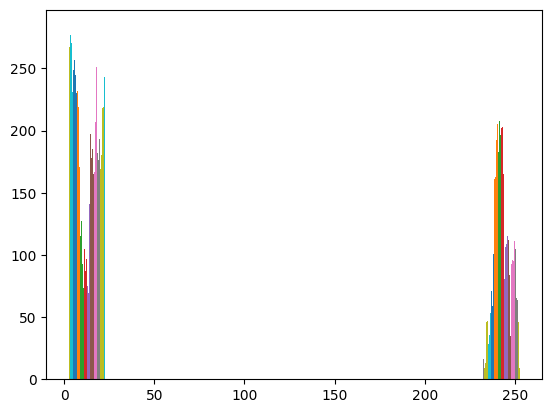

In [261]:
plt.hist(thresh)

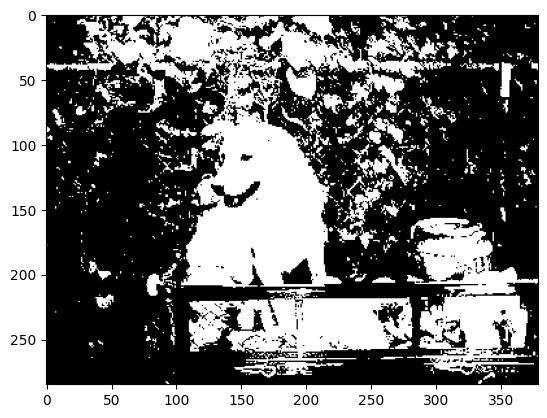

In [262]:
plt.gray()
plt.imshow(thresh)

In [263]:
img = cv2.imread(r'D:\College\pccoe\5th sem\CV\Practicals\Final_practicals\something-main\something-main\dog\Dog Segmentation\Images\dog.8795.jpg', cv2.IMREAD_GRAYSCALE)

##### local

In [264]:
dummy = img.copy().astype(float)

for i in range(dummy.shape[0]):
    for j in range(dummy.shape[1]):
        
        res = np.mean(dummy[i : i + 3 + 1 , j : j + 3 + 1]) 
        dummy[i , j] = 1 if res > 100 else 0



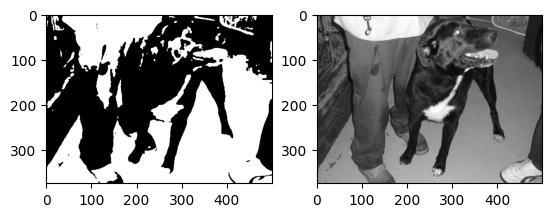

In [265]:
plt.figure()
plt.subplot(121)
plt.imshow(dummy)

plt.subplot(122)
plt.imshow(img)

#### Region Growing